In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import numpy as np


In [41]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\notebooks\02_feature_engineering\SSW_Data_Encoded.csv')

df1.head()

,Gender_Diverse,Gender_Female,Gender_Male,Gender_Prefer not to say,Location_Preferences_Local Only,Location_Preferences_Local or Remote,Location_Preferences_Remote Only,Longitude,Latitude,Age,...,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Sum_Skills_Off_ab_avg,Activity_Status
0,0,1,0,0,0,1,0,13.581876,52.376172,25,...,1,2,5,5,2,5,1,2,1,3
1,0,0,1,0,0,0,1,13.648641,52.644114,25,...,4,2,2,5,2,1,4,3,0,0
2,0,1,0,0,0,1,0,13.125491,52.531250,21,...,0,0,0,4,3,4,1,3,0,2
3,0,1,0,0,0,1,0,13.199572,52.450986,28,...,0,0,0,4,4,5,3,5,0,1
4,0,0,1,0,0,1,0,13.277228,52.599578,31,...,3,1,1,3,5,3,1,3,1,3


In [42]:
features_list = df1.columns.tolist()

for feature in features_list:
    print(feature)

Gender_Diverse
Gender_Female
Gender_Male
Gender_Prefer not to say
Location_Preferences_Local Only
Location_Preferences_Local or Remote
Location_Preferences_Remote Only
Longitude
Latitude
Age
Count_Programming_and_Software_Development_off
Count_Project_Management_off
Count_Accounting_and_Finance_off
Count_Marketing_and_Advertising_off
Count_Sales_and_Customer_Service_off
Count_Human_Resources_and_Leadership_off
Count_Graphic_Design_and_Illustration_off
Count_Photography_and_Photo_Editing_off
Count_Music_instruments_Composition_and_Production_off
Count_Writing_and_Editing_off
Count_Arts_and_Crafts_and_DIY_Projects_off
Count_Learning_Foreign_Languages_off
Count_Written_and_Oral_Communication_in_Various_Languages_off
Count_Interpretation_and_Translation_off
Count_Computer_and_Software_Application_Operation_off
Count_Network_Administration_and_IT_Support_off
Count_Electronics_and_Robotics_off
Count_Web_Design_and_Development_off
Count_Data_Analysis_and_Visualization_off
Count_Interpersonal_

In [43]:
selected_features = [
    'Last_Seen',
    'Response_Time',
    'Sum_Skills_Off_ab_avg',
    'Activity_Status'
]

df2 = df1[selected_features]
df2.head()

,Last_Seen,Response_Time,Sum_Skills_Off_ab_avg,Activity_Status
0,5,2,1,3
1,2,0,0,0
2,2,3,0,2
3,2,1,0,1
4,2,2,1,3


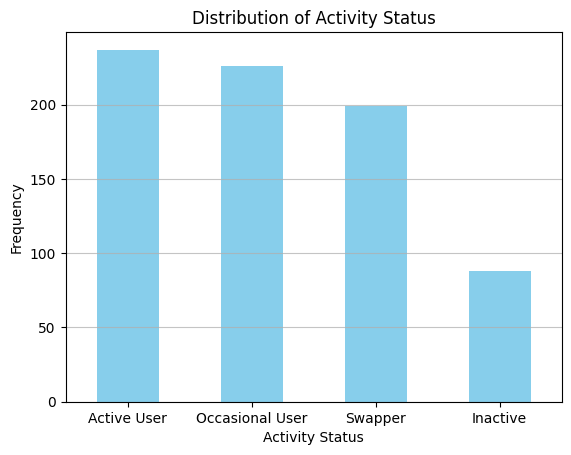

In [44]:
status_mappings = {
    3: 'Swapper',
    2: 'Active User',
    1: 'Occasional User',
    0: 'Inactive'
}

df3 = pd.DataFrame({'Mapped_Activity_Status': df2['Activity_Status'].map(status_mappings)})

df3['Mapped_Activity_Status'].value_counts().plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Activity Status')
plt.ylabel('Frequency')
plt.title('Distribution of Activity Status')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
features_list2 = df2.columns.tolist()

for feature in features_list2:
    print(feature)

Last_Seen
Response_Time
Sum_Skills_Off_ab_avg
Activity_Status


In [8]:
# Split the DataFrame into input variables (features) and output variables
X = df2.iloc[:, :-1]  
y = df2.iloc[:, -1:]  

In [9]:
print(X.shape)
print(y.shape)

(750, 3)
(750, 1)


# Build Classifier

In [10]:
clf = DecisionTreeClassifier()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
predictions = clf.predict(X_test)
predictions

array([2, 2, 0, 2, 3, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 3, 2, 0, 1, 3, 0, 1, 2, 1, 3, 0, 1, 3, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 0, 2, 2, 3, 3, 3, 3, 1, 2, 1, 1, 3, 0, 1, 1, 2, 1, 2, 2,
       3, 3, 1, 0, 2, 1, 3, 3, 3, 1, 3, 0, 2, 3, 3, 2, 3, 2, 1, 2, 2, 3,
       3, 1, 3, 2, 2, 0, 2, 2, 3, 2, 1, 1, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0,
       3, 1, 3, 1, 2, 1, 2, 3, 2, 0, 3, 2, 2, 1, 2, 1, 3, 3, 0, 1, 2, 3,
       2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 1, 2, 3, 1,
       1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 2, 3, 3, 0, 2, 2,
       1, 0, 2, 1, 1, 3, 3, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 1,
       1, 2, 3, 2, 0, 1, 1, 0, 3, 3, 1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 1, 2,
       1, 3, 1, 3, 0, 2], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1,2,3])

array([[27,  0,  0,  0],
       [ 0, 71,  0,  0],
       [ 0,  0, 91,  0],
       [ 0,  0,  0, 59]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)

array([1., 1., 1., 1.])

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1., 1., 1., 1.])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Inactive', 'Occasional User', 'Active User', 'Swapper']))

                 precision    recall  f1-score   support

       Inactive       1.00      1.00      1.00        27
Occasional User       1.00      1.00      1.00        71
    Active User       1.00      1.00      1.00        91
        Swapper       1.00      1.00      1.00        59

       accuracy                           1.00       248
      macro avg       1.00      1.00      1.00       248
   weighted avg       1.00      1.00      1.00       248



In [19]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Response_Time,0.448743
Last_Seen,0.327769
Sum_Skills_Off_ab_avg,0.223488


<Axes: >

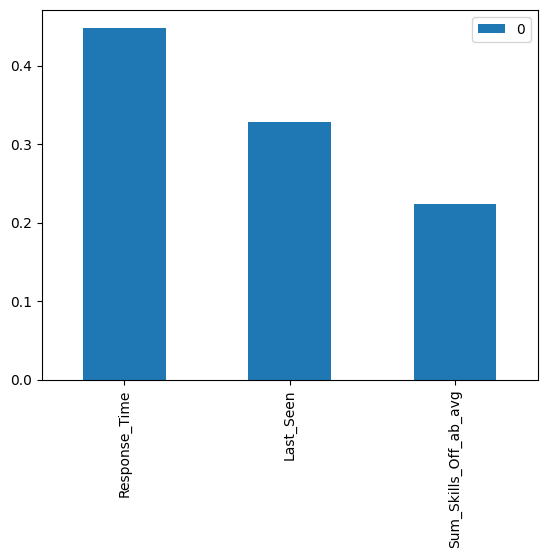

In [20]:
feature_importance.plot(kind='bar')

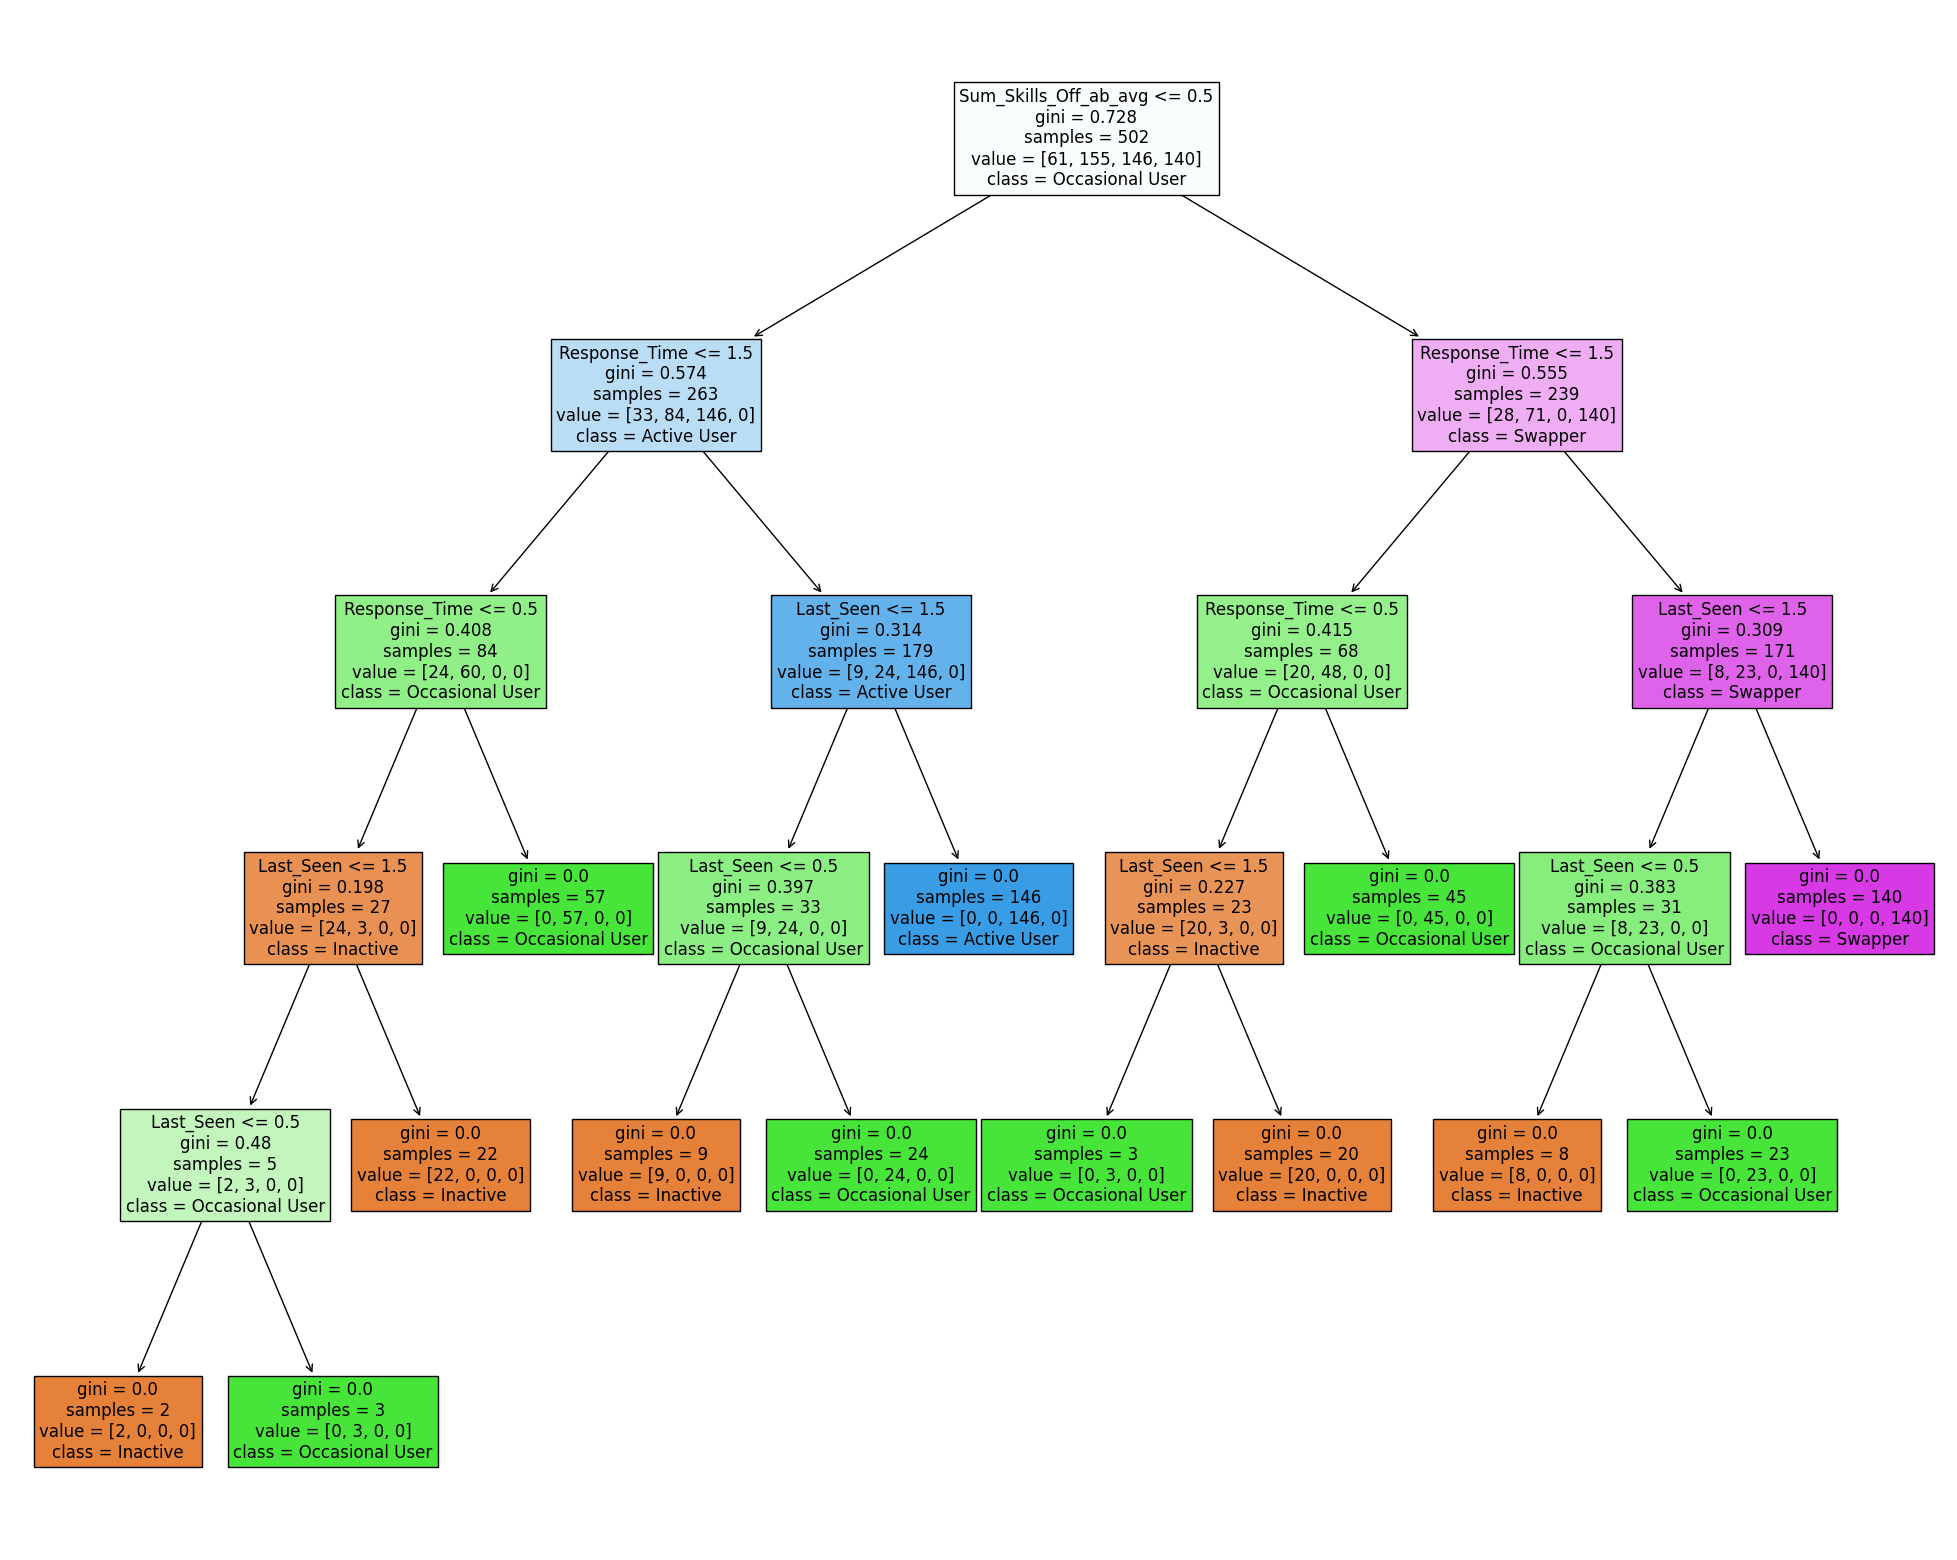

In [21]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Inactive', 1:'Occasional User', 2: 'Active User', 3: 'Swapper'},
                   filled=True,
                  fontsize=12)

# Prepare Model for Flask API

In [46]:
import pickle

In [48]:
with open('Activity_Status_Model.pkl', 'wb') as file:
    pickle.dump(clf, file)